In [3]:
import sqlite3
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [4]:
conn = sqlite3.connect('C:\\Users\\mason\\Documents\\Sql Scripts\\ecc 200 005 sec 40-eris.db')
df = pd.read_sql_query("SELECT * FROM rxtotx", conn)
dfb = pd.read_sql_query("SELECT * FROM cryptTime", conn)
dfc = pd.read_sql_query("SELECT * FROM first_tx_last_rx", conn)

In [5]:
conn2 = sqlite3.connect('C:\\Users\\mason\\Documents\\Sql Scripts\\aes 200 005 sec 40-eris.db')
df2 = pd.read_sql_query("SELECT * FROM rxtotx", conn2)
dfb2 = pd.read_sql_query("SELECT * FROM cryptTime", conn2)
dfc2 = pd.read_sql_query("SELECT * FROM first_tx_last_rx", conn2)

In [6]:
conn3 = sqlite3.connect('C:\\Users\\mason\\Documents\\Sql Scripts\\noe 200 005 sec 40-eris.db')
df3 = pd.read_sql_query("SELECT * FROM rxtotx", conn3)
dfb3 = pd.read_sql_query("SELECT * FROM cryptTime", conn3)
dfc3 = pd.read_sql_query("SELECT * FROM first_tx_last_rx", conn3)

In [7]:
conn4 = sqlite3.connect('C:\\Users\\mason\\Documents\\Sql Scripts\\rsa 200 005 sec-new-eris.db')
df4 = pd.read_sql_query("SELECT * FROM rxtotx", conn4)
dfb4 = pd.read_sql_query("SELECT * FROM cryptTime", conn4)
dfc4 = pd.read_sql_query("SELECT * FROM first_tx_last_rx", conn4)


In [8]:
conn5 = sqlite3.connect('C:\\Users\\mason\\Documents\\Sql Scripts\\noe test 250 dif sec 40-eris.db')
df5 = pd.read_sql_query("SELECT * FROM rxtotx", conn5)
dfb5 = pd.read_sql_query("SELECT * FROM cryptoOverhead", conn5)
#dfc5 = pd.read_sql_query("SELECT * FROM first_tx_last_rx", conn5)

In [9]:
conn6 = sqlite3.connect('C:\\Users\\mason\\Documents\\Sql Scripts\\he 200 005 sec-eris.db')
df6 = pd.read_sql_query("SELECT * FROM rxtotx", conn6)
dfb6 = pd.read_sql_query("SELECT * FROM cryptTime", conn6)
dfc6 = pd.read_sql_query("SELECT * FROM first_tx_last_rx", conn6)

In [10]:
df.tail()

,pktSeqNum,srcIp,dstIp,pktSizeBytes,latency,latencywithinterval,encryptionTime,decryptionTime,declength,overhead,totaltime,TxRxDistance
42740,8619,7.0.0.70,7.0.0.198,1106,1.825009,2.378009,0.000531,0.000276,1011,0.000807,1.825816,161.789987
42741,8619,7.0.0.70,7.0.0.199,1106,1.825009,2.378009,0.000531,0.000276,1011,0.000807,1.825816,181.592951
42742,8619,7.0.0.70,7.0.0.43,1106,1.836009,2.389009,0.000531,0.000276,1011,0.000807,1.836816,140.057131
42743,8619,7.0.0.70,7.0.0.103,1106,1.836009,2.389009,0.000531,0.000276,1011,0.000807,1.836816,140.228385
42744,8619,7.0.0.70,7.0.0.185,1106,1.836009,2.389009,0.000531,0.000276,1011,0.000807,1.836816,102.839681


In [11]:
dfc2.head()

,srcIp,dstIp,first_tx_time,last_rx_time,pktSizeBytes,latency,encryptionTime,decryptionTime,declength,overhead,TxRxDistance
0,7.0.0.10,7.0.0.104,2.152878,3.866029,913,1.713151,0.000003,0.000002,910,0.000005,121.655251
1,7.0.0.10,7.0.0.109,2.152878,3.866029,913,1.713151,0.000003,0.000002,910,0.000005,28.284271
2,7.0.0.10,7.0.0.11,2.152878,3.866029,913,1.713151,0.000003,0.000002,910,0.000005,20.000000
3,7.0.0.10,7.0.0.110,2.152878,3.866029,913,1.713151,0.000003,0.000002,910,0.000005,20.000000
4,7.0.0.10,7.0.0.125,2.152878,3.866029,913,1.713151,0.000003,0.000002,910,0.000005,102.839681


In [12]:
mean_df1 = df['latency'].mean()
print(mean_df1)

0.909623140797099


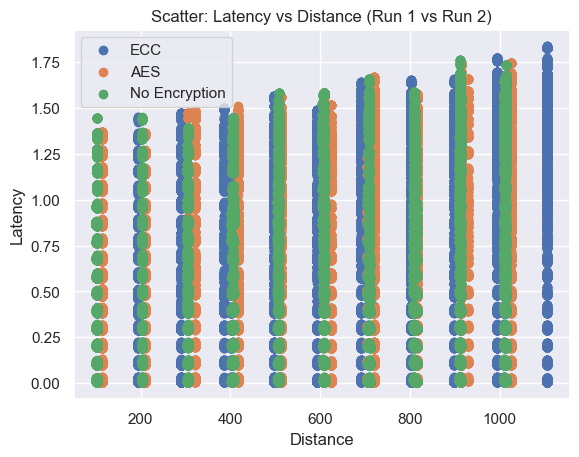

In [13]:
plt.scatter(df["pktSizeBytes"], df["latency"], label="ECC")
plt.scatter(df2["pktSizeBytes"], df2["latency"], label="AES")
plt.scatter(df3["pktSizeBytes"], df3["latency"], label="No Encryption")
#plt.scatter(df4["pktSizeBytes"], df4["latency"], label="RSA")
#plt.scatter(df6["pktSizeBytes"], df6["latency"], label="Homomorphic")

plt.xlabel('Distance')
plt.ylabel('Latency')
plt.title('Scatter: Latency vs Distance (Run 1 vs Run 2)')
plt.legend()
plt.show()

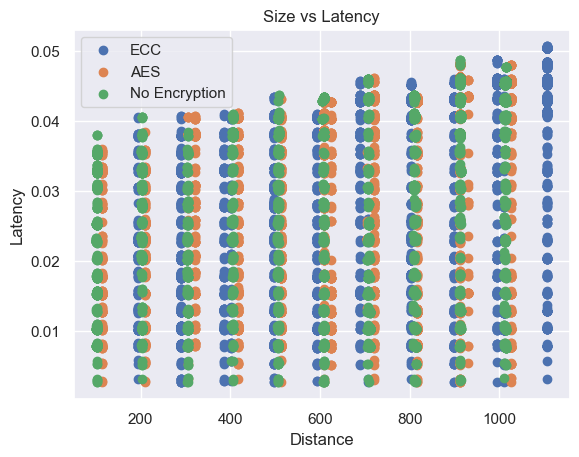

In [14]:

plt.scatter(dfc["pktSizeBytes"], dfc["latency"]/40, label="ECC")

plt.scatter(dfc2["pktSizeBytes"], dfc2["latency"]/40, label="AES")

plt.scatter(dfc3["pktSizeBytes"], dfc3["latency"]/40, label="No Encryption")

#plt.scatter(dfc4["pktSizeBytes"], dfc4["latency"]/40, label="RSA")

#plt.scatter(dfc6["pktSizeBytes"], dfc6["latency"], label="Homomorphic")

plt.xlabel('Distance')
plt.ylabel('Latency')
plt.title('Size vs Latency')
plt.legend()
plt.show()

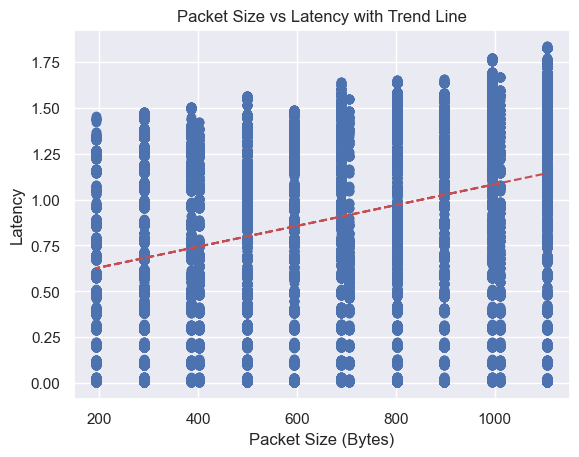

In [15]:
# Scatter plot
plt.scatter(df["pktSizeBytes"], df["latency"])

# Fit a linear trend line
z = np.polyfit(df["pktSizeBytes"], df["latency"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(df["pktSizeBytes"], p(df["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

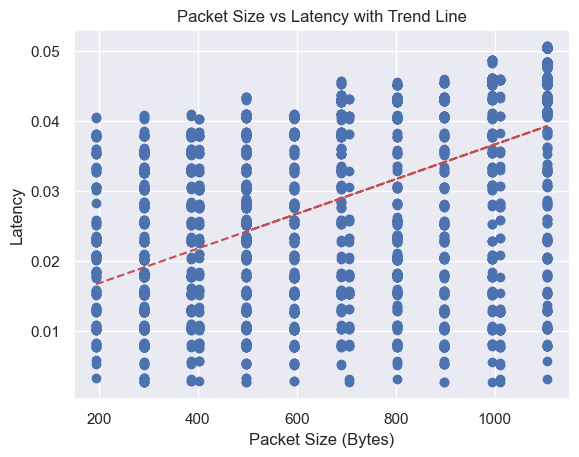

In [16]:
# Scatter plot
plt.scatter(dfc["pktSizeBytes"], dfc["latency"]/40)

# Fit a linear trend line
z = np.polyfit(dfc["pktSizeBytes"], dfc["latency"]/40, 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(dfc["pktSizeBytes"], p(dfc["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

In [17]:
mean_dfc = dfc['latency'].mean()
print(mean_dfc/40)

0.030031806625964663


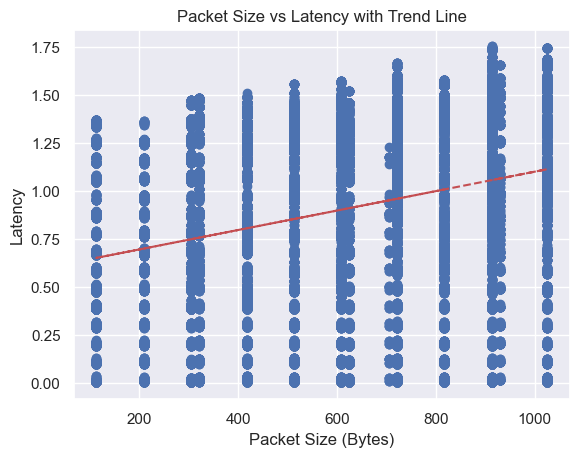

In [18]:
# Scatter plot
plt.scatter(df2["pktSizeBytes"], df2["latency"])

# Fit a linear trend line
z = np.polyfit(df2["pktSizeBytes"], df2["latency"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(df2["pktSizeBytes"], p(df2["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

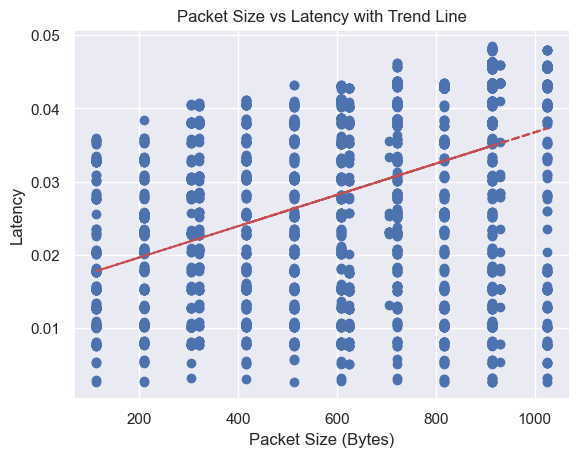

In [19]:
# Scatter plot
plt.scatter(dfc2["pktSizeBytes"], dfc2["latency"]/40)

# Fit a linear trend line
z = np.polyfit(dfc2["pktSizeBytes"], dfc2["latency"]/40, 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(dfc2["pktSizeBytes"], p(dfc2["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

In [20]:
mean_dfc2 = dfc2['latency'].mean()
print(mean_dfc2/40)

0.029731899822529596


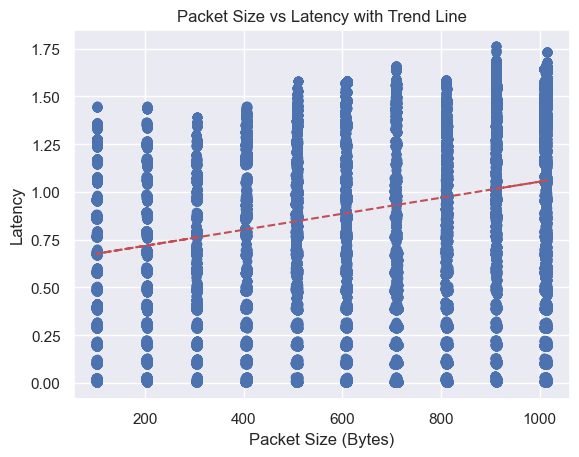

In [21]:
# Scatter plot
plt.scatter(df3["pktSizeBytes"], df3["latency"])

# Fit a linear trend line
z = np.polyfit(df3["pktSizeBytes"], df3["latency"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(df3["pktSizeBytes"], p(df3["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

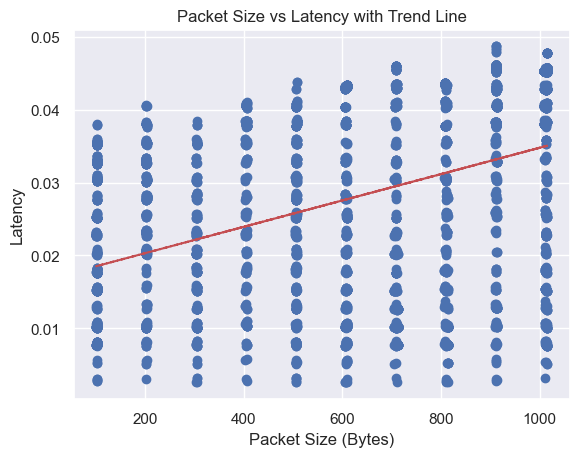

In [22]:
plt.scatter(dfc3["pktSizeBytes"], dfc3["latency"]/40)

# Fit a linear trend line
z = np.polyfit(dfc3["pktSizeBytes"], dfc3["latency"]/40, 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(dfc3["pktSizeBytes"], p(dfc3["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

In [23]:
mean_dfc3 = dfc3['latency'].mean()
print(mean_dfc3/40)

0.02851064928292884


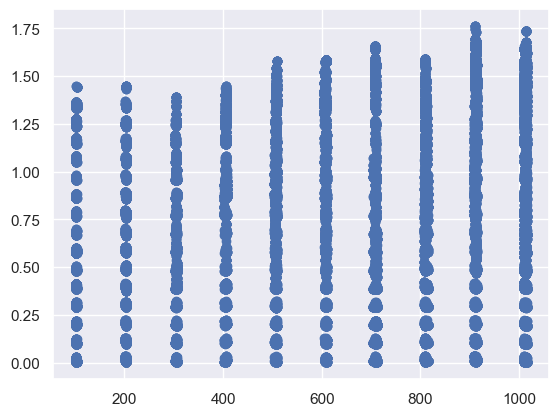

In [24]:
plt.scatter(df3["pktSizeBytes"], df3["latency"])

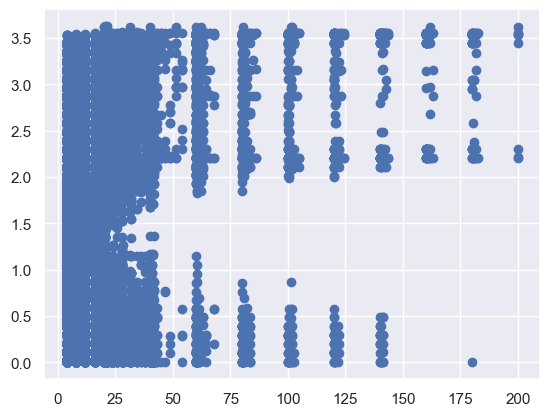

In [25]:
plt.scatter(df4["TxRxDistance"], df4["latency"])

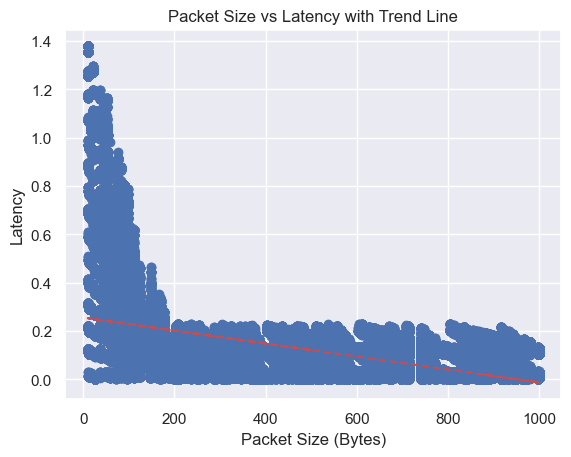

In [26]:
# Scatter plot
plt.scatter(df5["pktSizeBytes"], df5["latency"])

# Fit a linear trend line
z = np.polyfit(df5["pktSizeBytes"], df5["latency"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(df5["pktSizeBytes"], p(df5["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

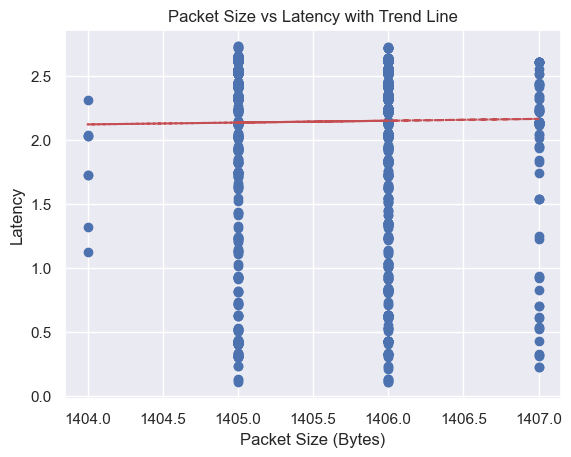

In [27]:
# Scatter plot
plt.scatter(dfc6["pktSizeBytes"], dfc6["latency"])

# Fit a linear trend line
z = np.polyfit(dfc6["pktSizeBytes"], dfc6["latency"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(dfc6["pktSizeBytes"], p(dfc6["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency with Trend Line")
plt.show()

In [28]:
mean_dfc6 = dfc6['latency'].mean()
print(mean_dfc6)

2.1433940071389577


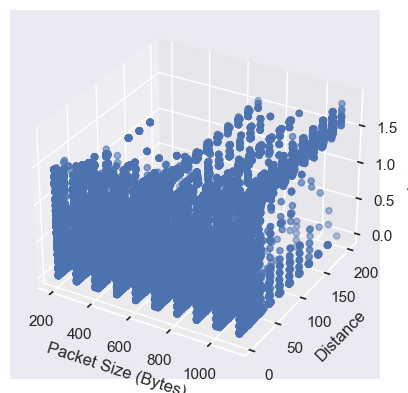

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pktSizeBytes'], df['TxRxDistance'], df['latency'])
ax.set_xlabel('Packet Size (Bytes)')
ax.set_ylabel('Distance')
ax.set_zlabel('Latency')

plt.show()

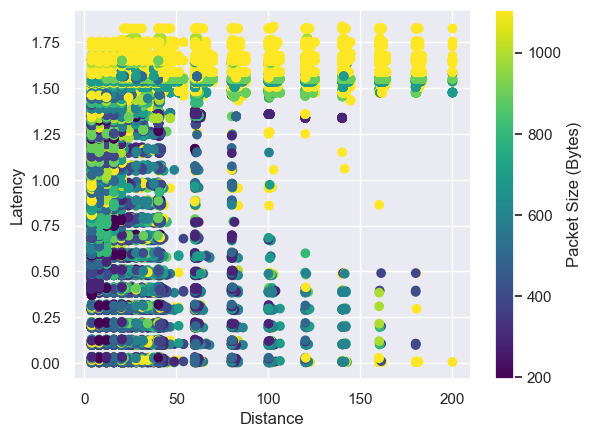

In [30]:
plt.scatter(df['TxRxDistance'], df['latency'], c=df['pktSizeBytes'], cmap='viridis')
plt.xlabel('Distance')
plt.ylabel('Latency')
plt.colorbar(label='Packet Size (Bytes)')
plt.show()

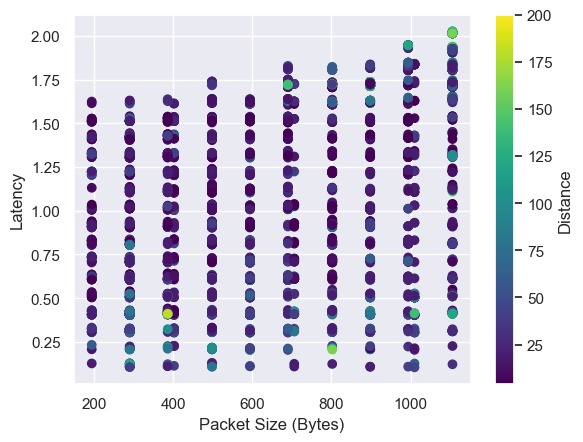

In [31]:
plt.scatter(dfc['pktSizeBytes'], dfc['latency'], c=dfc['TxRxDistance'], cmap='viridis')
plt.xlabel('Packet Size (Bytes)')
plt.ylabel('Latency')
plt.colorbar(label='Distance')
plt.show()

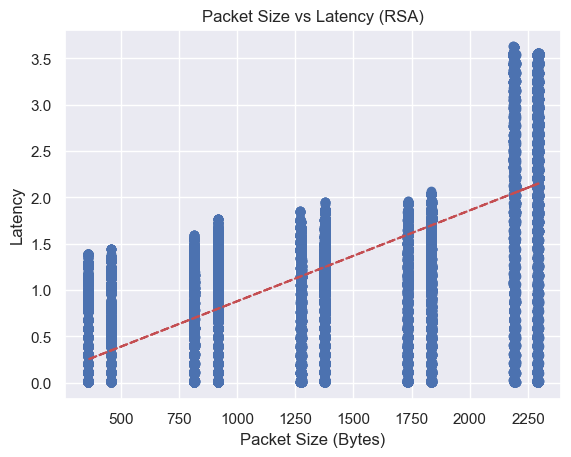

In [32]:
# Scatter plot
plt.scatter(df4["pktSizeBytes"], df4["latency"])

# Fit a linear trend line
z = np.polyfit(df4["pktSizeBytes"], df4["latency"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(df4["pktSizeBytes"], p(df4["pktSizeBytes"]), "r--")  # Red dashed line

plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Latency")
plt.title("Packet Size vs Latency (RSA)")
plt.show()

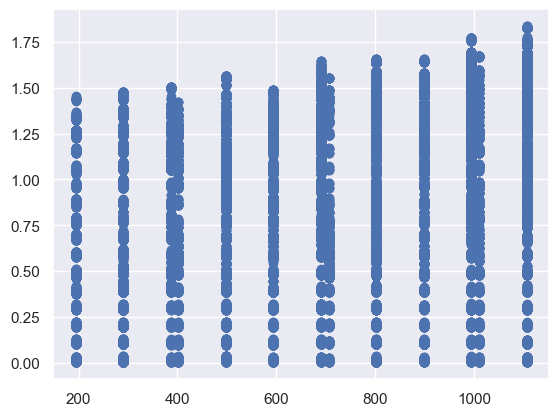

In [33]:
plt.scatter(df["pktSizeBytes"], df["totaltime"])

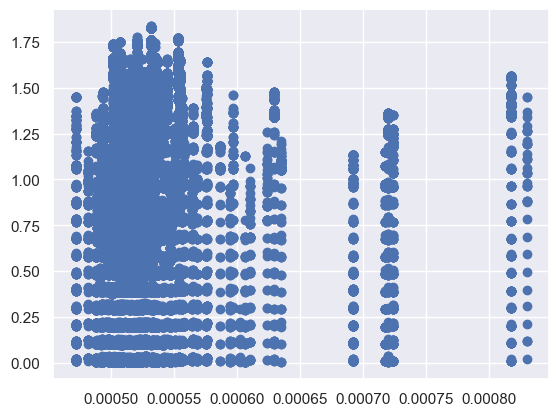

In [34]:
plt.scatter(df["encryptionTime"], df["totaltime"])

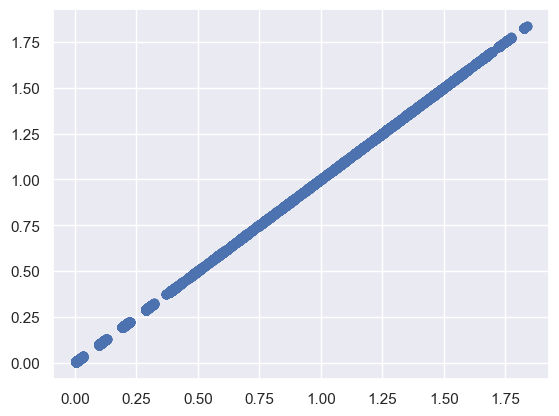

In [35]:
plt.scatter(df["latency"], df["totaltime"])

In [36]:
dfb.head()

,nodeId,encryptionTime,decryptionTime,declength,overhead
0,0,0.000514,0.000251,1013,0.000765
1,1,0.000511,0.000248,606,0.000758
2,2,0.000501,0.000249,100,0.000749
3,3,0.000502,0.000254,608,0.000756
4,4,0.000534,0.000252,606,0.000785


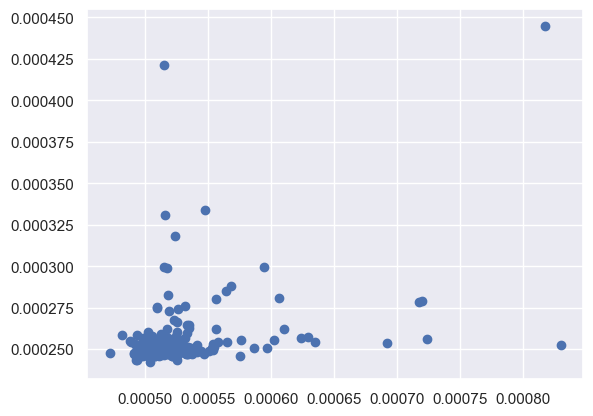

In [37]:
plt.scatter(dfb["encryptionTime"], dfb["decryptionTime"])

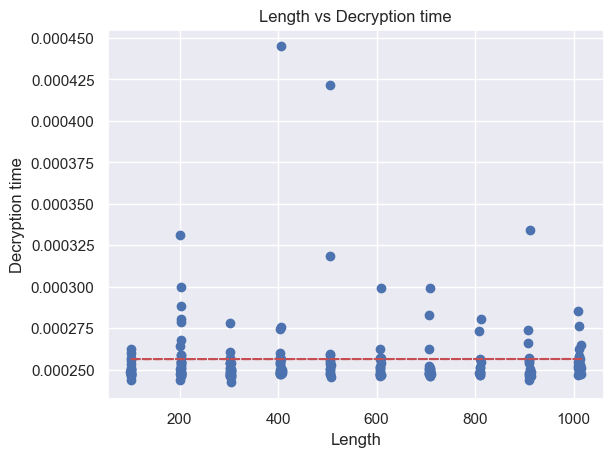

In [38]:

# Scatter plot
plt.scatter(dfb["declength"], dfb["decryptionTime"])

# Fit a linear trend line
z = np.polyfit(dfb["declength"], dfb["decryptionTime"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(dfb["declength"], p(dfb["declength"]), "r--")  # Red dashed line

plt.xlabel("Length")
plt.ylabel("Decryption time")
plt.title("Length vs Decryption time")
plt.show()

In [39]:
bdirt = dfb[(dfb["encryptionTime"] < dfb["encryptionTime"].quantile(0.025)) | (dfb["encryptionTime"] > dfb["encryptionTime"].quantile(0.95)) | 
           (dfb["decryptionTime"] < dfb["decryptionTime"].quantile(0.025)) | (dfb["decryptionTime"] > dfb["decryptionTime"].quantile(0.95))]

print(bdirt.shape[0] / dfb.shape[0])
clean_dfb = dfb[~dfb["nodeId"].isin(bdirt["nodeId"])]

0.145


In [40]:
bdirt2 = dfb2[(dfb2["encryptionTime"] < dfb2["encryptionTime"].quantile(0.025)) | (dfb2["encryptionTime"] > dfb2["encryptionTime"].quantile(0.95)) | 
           (dfb2["decryptionTime"] < dfb2["decryptionTime"].quantile(0.025)) | (dfb2["decryptionTime"] > dfb2["decryptionTime"].quantile(0.95))]

print(bdirt2.shape[0] / dfb2.shape[0])
clean_dfb2 = dfb2[~dfb2["nodeId"].isin(bdirt2["nodeId"])]

0.135


In [41]:
bdirt3 = dfb3[(dfb3["encryptionTime"] < dfb3["encryptionTime"].quantile(0.025)) | (dfb3["encryptionTime"] > dfb3["encryptionTime"].quantile(0.95)) | 
           (dfb3["decryptionTime"] < dfb3["decryptionTime"].quantile(0.025)) | (dfb3["decryptionTime"] > dfb3["decryptionTime"].quantile(0.95))]

print(bdirt3.shape[0] / dfb3.shape[0])
clean_dfb3 = dfb3[~dfb3["nodeId"].isin(bdirt3["nodeId"])]

0.0


In [42]:
bdirt4 = dfb4[(dfb4["encryptionTime"] < dfb4["encryptionTime"].quantile(0.025)) | (dfb4["encryptionTime"] > dfb4["encryptionTime"].quantile(0.95)) | 
           (dfb4["decryptionTime"] < dfb4["decryptionTime"].quantile(0.025)) | (dfb4["decryptionTime"] > dfb4["decryptionTime"].quantile(0.95))]

print(bdirt4.shape[0] / dfb4.shape[0])
clean_dfb4 = dfb4[~dfb4["nodeId"].isin(bdirt4["nodeId"])]

0.14


In [43]:
clean_dfb4.head()

,nodeId,encryptionTime,decryptionTime,declength,overhead
0,0,0.000034,0.001029,405,0.001063
1,1,0.000043,0.001583,507,0.001626
2,2,0.000067,0.002559,1009,0.002626
3,3,0.000018,0.000522,102,0.000541
4,4,0.000065,0.002552,1012,0.002617


In [44]:
bdirt6 = dfb6[(dfb6["encryptionTime"] < dfb6["encryptionTime"].quantile(0.025)) | (dfb6["encryptionTime"] > dfb6["encryptionTime"].quantile(0.95)) | 
           (dfb6["decryptionTime"] < dfb6["decryptionTime"].quantile(0.025)) | (dfb6["decryptionTime"] > dfb6["decryptionTime"].quantile(0.95))]

print(bdirt6.shape[0] / dfb6.shape[0])
clean_dfb6 = dfb6[~dfb6["nodeId"].isin(bdirt6["nodeId"])]

0.14


In [45]:
clean_dfb6.columns

Index(['nodeId', 'encryptionTime', 'decryptionTime', 'declength', 'overhead'], dtype='object')

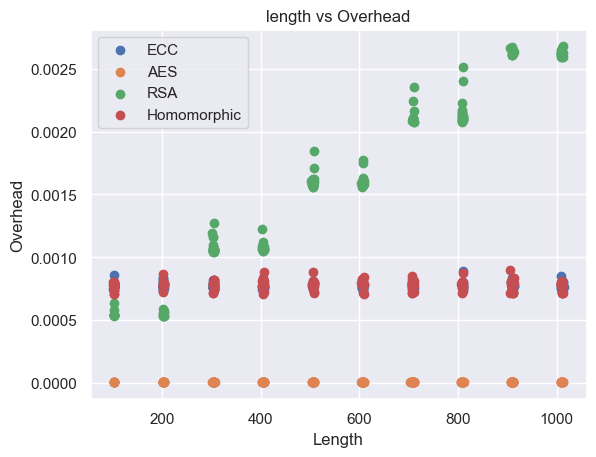

In [46]:
plt.scatter(clean_dfb["declength"], clean_dfb["overhead"], label='ECC')
plt.scatter(clean_dfb2["declength"], clean_dfb2["overhead"], label='AES')
plt.scatter(clean_dfb4["declength"], clean_dfb4["overhead"], label='RSA')
plt.scatter(clean_dfb6["declength"], clean_dfb6["overhead"], label='Homomorphic')

plt.xlabel('Length')
plt.ylabel('Overhead')
plt.title('length vs Overhead')
plt.legend()
plt.show()

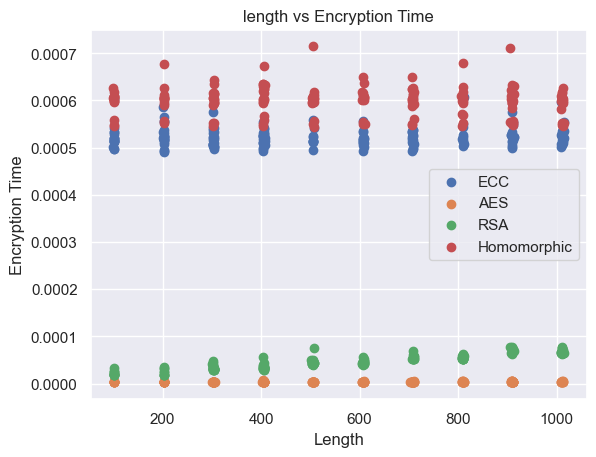

In [47]:
plt.scatter(clean_dfb["declength"], clean_dfb["encryptionTime"], label='ECC')
plt.scatter(clean_dfb2["declength"], clean_dfb2["encryptionTime"], label='AES')
plt.scatter(clean_dfb4["declength"], clean_dfb4["encryptionTime"], label='RSA')
plt.scatter(clean_dfb6["declength"], clean_dfb6["encryptionTime"], label='Homomorphic')

plt.xlabel('Length')
plt.ylabel('Encryption Time')
plt.title('length vs Encryption Time')
plt.legend()
plt.show()

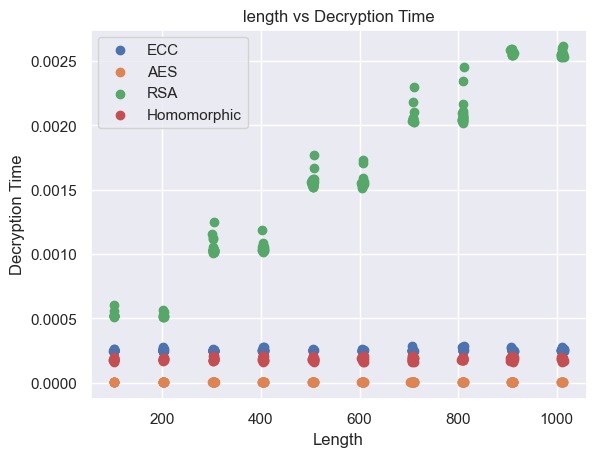

In [48]:
plt.scatter(clean_dfb["declength"], clean_dfb["decryptionTime"], label='ECC')
plt.scatter(clean_dfb2["declength"], clean_dfb2["decryptionTime"], label='AES')
plt.scatter(clean_dfb4["declength"], clean_dfb4["decryptionTime"], label='RSA')
plt.scatter(clean_dfb6["declength"], clean_dfb6["decryptionTime"], label='Homomorphic')

plt.xlabel('Length')
plt.ylabel('Decryption Time')
plt.title('length vs Decryption Time')
plt.legend()
plt.show()

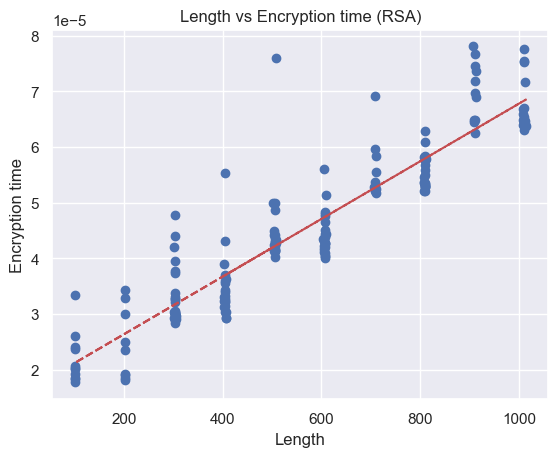

In [49]:
# Scatter plot
plt.scatter(clean_dfb4["declength"], clean_dfb4["encryptionTime"])

# Fit a linear trend line
z = np.polyfit(clean_dfb4["declength"], clean_dfb4["encryptionTime"], 1)  # 1 = linear
p = np.poly1d(z)

# Plot the trend line
plt.plot(clean_dfb4["declength"], p(clean_dfb4["declength"]), "r--")  # Red dashed line

plt.xlabel("Length")
plt.ylabel("Encryption time")
plt.title("Length vs Encryption time (RSA)")
plt.show()

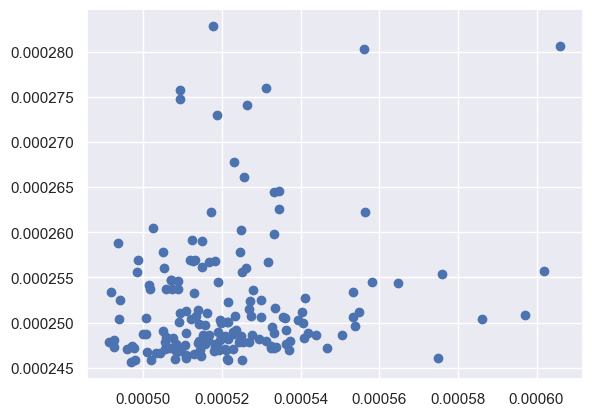

In [50]:
plt.scatter(clean_dfb["encryptionTime"], clean_dfb["decryptionTime"])

C:\Users\mason\AppData\Local\Temp\ipykernel_6656\456248226.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


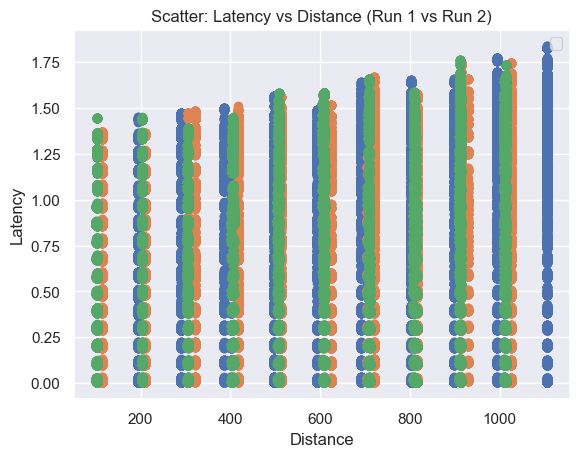

In [51]:
plt.scatter(df["pktSizeBytes"], df["latency"])
plt.scatter(df2["pktSizeBytes"], df2["latency"])
plt.scatter(df3["pktSizeBytes"], df3["latency"])

plt.xlabel('Distance')
plt.ylabel('Latency')
plt.title('Scatter: Latency vs Distance (Run 1 vs Run 2)')
plt.legend()
plt.show()

In [52]:
mean_dfc4 = dfc4['latency'].mean()
mean_dfb = dfb['overhead'].mean()
mean_dfb2 = dfb2['overhead'].mean()
mean_dfb4 = dfb4['overhead'].mean()
mean_dfb6 = dfb6['overhead'].mean()

print("No encryption Average Latency:")
print(round(mean_dfc3/40, 7))
print("ECC Average Latency:")
print(round(mean_dfc/40, 7))
print("AES Average Latency:")
print(round(mean_dfc2/40, 7))
print("RSA Average Latency:")
print(round(mean_dfc4/40, 7))
print("Homomorphic Average Latency:")
print(round(mean_dfc6, 7))

print("ECC Average Overhead:")
print(round(mean_dfb, 7))
print("AES Average Overhead:")
print(round(mean_dfb2, 7))
print("RSA Average Overhead:")
print(round(mean_dfb4, 7))
print("Homomorphic Average Overhead:")
print(round(mean_dfb6, 7))

print("No encryption Total average:")
print(round((mean_dfc3/40), 7))
print("ECC Total average:")
print(round((mean_dfc/40) + mean_dfb, 7))
print("AES Total average:")
print(round((mean_dfc2/40) + mean_dfb2, 7))
print("RSA Total average:")
print(round((mean_dfc4/40) + mean_dfb4, 7))
print("Homomorphic Total average:")
print(round((mean_dfc6) + mean_dfb6, 7))

No encryption Average Latency:
0.0285106
ECC Average Latency:
0.0300318
AES Average Latency:
0.0297319
RSA Average Latency:
0.0571696
Homomorphic Average Latency:
2.143394
ECC Average Overhead:
0.0007865
AES Average Overhead:
6.3e-06
RSA Average Overhead:
0.0016774
Homomorphic Average Overhead:
0.0007916
No encryption Total average:
0.0285106
ECC Total average:
0.0308183
AES Total average:
0.0297382
RSA Total average:
0.058847
Homomorphic Total average:
2.1441856
